In [1]:
import control as ct
import math
import numpy as np
import sys

In [2]:
sys = ct.tf(1,[10,1])
sys

TransferFunction(
array([1]),
array([10,  1]),
outputs=1, inputs=1)

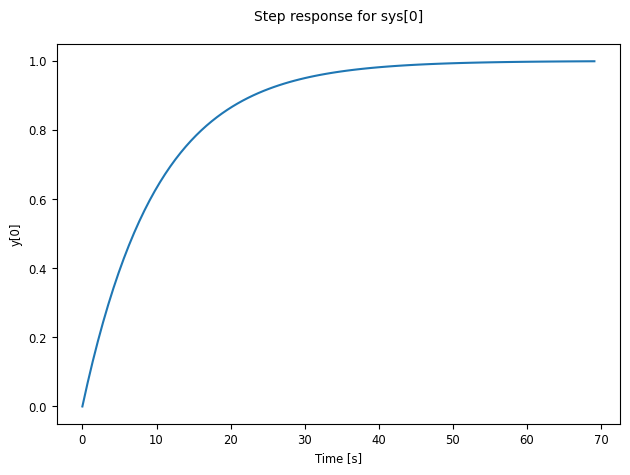

In [3]:
ct.step_response(sys).plot()

In [4]:
sysz = ct.sample_system(sys,0.1,'bilinear',prewarp_frequency = 2*math.pi/10)

In [5]:
sysz

TransferFunction(
array([0.00497675, 0.00497675]),
array([ 1.        , -0.99004649]),
dt=0.1,
name='sys[0]$sampled', outputs=1, inputs=1)

In [6]:
sysz.num[0][0][0]

np.float64(0.004976753625925978)

In [7]:
sysz.num[0][0][1]

np.float64(0.004976753625925978)

In [8]:
sysz.den[0][0][0]

np.float64(1.0)

In [9]:
sysz.den[0][0][1]

np.float64(-0.9900464927481482)

In [10]:
ct.step_response(sysz).y[0][0][0]

np.float64(0.004976753625925978)

In [11]:
ct.step_response(sysz).y[0][0][1]

np.float64(0.0148807247244716)

In [12]:
ct.step_response(sysz).y[0][0][2]

np.float64(0.024686116574865715)

In [13]:
ct.step_response(sysz).y[0][0][3]

np.float64(0.034393910386369686)

In [14]:
ct.step_response(sysz).y[0][0][99]

np.float64(0.6303960539595935)

In [15]:
sys = ct.tf(4,[1,2*1/math.sqrt(2)*2, 4])
sys

TransferFunction(
array([4]),
array([1.        , 2.82842712, 4.        ]),
outputs=1, inputs=1)

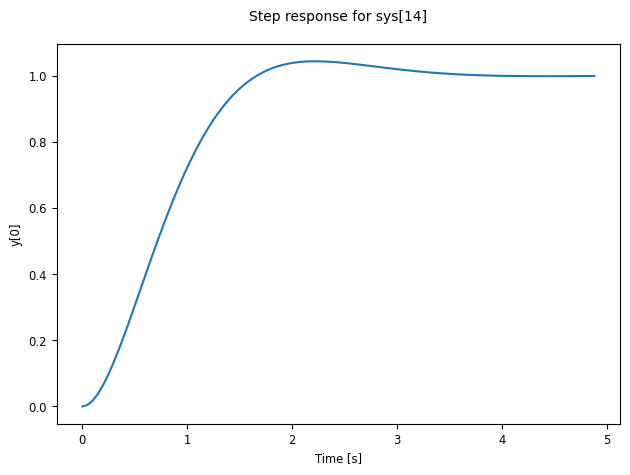

In [16]:
ct.step_response(sys).plot()

In [17]:
sysz = ct.sample_system(sys,0.1,'bilinear',prewarp_frequency = 2)

In [18]:
sysz

TransferFunction(
array([0.00873905, 0.01747809, 0.00873905]),
array([ 1.        , -1.71869074,  0.75364692]),
dt=0.1,
name='sys[14]$sampled', outputs=1, inputs=1)

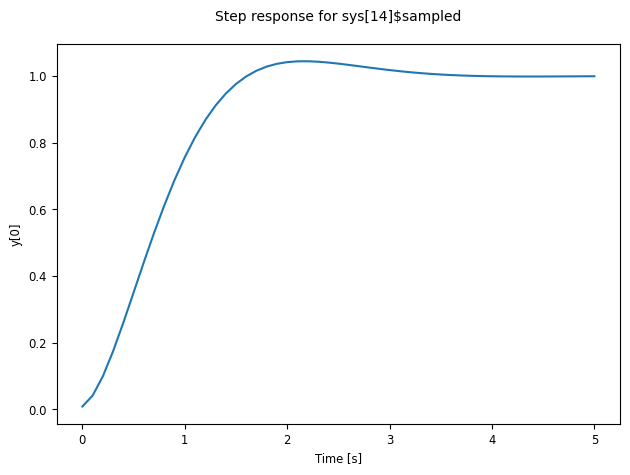

In [19]:
ct.step_response(sysz).plot()

In [20]:
sysz.num[0][0][0]

np.float64(0.008739046114517035)

In [21]:
sysz.num[0][0][1]

np.float64(0.017478092229033848)

In [22]:
sysz.num[0][0][2]

np.float64(0.00873904611451748)

In [23]:
sysz.den[0][0][0]

np.float64(1.0)

In [24]:
sysz.den[0][0][1]

np.float64(-1.7186907397711062)

In [25]:
sysz.den[0][0][2]

np.float64(0.7536469242291746)

In [26]:
ct.step_response(sysz).y[0][0][0]

np.float64(0.008739046114517035)

In [27]:
ct.step_response(sysz).y[0][0][1]

np.float64(0.041236855975003976)

In [28]:
ct.step_response(sysz).y[0][0][2]

np.float64(0.09924343173467982)

In [29]:
ct.step_response(sysz).y[0][0][3]

np.float64(0.1744469218931253)

In [30]:
ct.step_response(sysz).y[0][0][19]

np.float64(1.0361699725173787)

In [31]:
sysss = ct.similarity_transform(ct.tf2ss(sys), np.fliplr(np.identity(2)))
sysss

StateSpace(
array([[ 0.        ,  1.        ],
       [-4.        , -2.82842712]]),
array([[0.],
       [1.]]),
array([[4., 0.]]),
array([[0.]]),
states=2, outputs=1, inputs=1)

In [32]:
sysssz = ct.sample_system(sysss,0.1,'bilinear',prewarp_frequency = 2)
sysssz

StateSpace(
array([[ 0.98252191,  0.08709897],
       [-0.34839586,  0.73616883]]),
array([[0.00436952],
       [0.08709897]]),
array([[3.96504382, 0.17419793]]),
array([[0.00873905]]),
dt=0.1,
name='sys[14]$sampled', states=2, outputs=1, inputs=1)

In [33]:
Phi,Gamma,H,J = ct.ssdata(sysssz)

In [34]:
np.set_printoptions(precision=15)

In [35]:
print(Phi)

[[ 0.982521907770966  0.087098965221857]
 [-0.348395860887428  0.736168832000141]]


In [36]:
print(Gamma)

[[0.004369523057259]
 [0.087098965221857]]


In [37]:
print(H)

[[3.965043815541932 0.174197930443714]]


In [38]:
print(J)

[[0.008739046114517]]


In [39]:
np.linalg.inv(np.identity(2) - Phi)

array([[ 7.547481857361692,  2.491661105814809],
       [-9.966644423259234,  0.500000000000001]])

In [40]:
np.linalg.matmul(H, np.linalg.inv(np.identity(2) - Phi))

array([[28.189927429446772,  9.966644423259234]])

In [41]:
np.linalg.matmul(np.linalg.inv(np.identity(2) - Phi), Gamma)

array([[2.499999999999999e-01],
       [8.326672684688674e-17]])

In [42]:
np.linalg.matmul(np.linalg.matmul(H, np.linalg.inv(np.identity(2) - Phi)), Gamma)

array([[0.991260953885483]])

In [43]:
np.linalg.norm(H)

np.float64(3.968868526184534)

In [44]:
np.linalg.norm(Gamma)

np.float64(0.08720850001270607)

In [45]:
np.linalg.norm(H)*np.linalg.norm(Gamma)

np.float64(0.3461190709161926)

In [46]:
sys = ct.tf(1,[1,0])
sys

TransferFunction(
array([1]),
array([1, 0]),
outputs=1, inputs=1)

In [47]:
sysz = ct.sample_system(sys,0.1,'bilinear')
sysz

TransferFunction(
array([0.05, 0.05]),
array([ 1., -1.]),
dt=0.1,
name='sys[32]$sampled', outputs=1, inputs=1)

In [49]:
sysz = ct.sample_system(sys,0.1,'euler')
sysz

TransferFunction(
array([0.1]),
array([ 1., -1.]),
dt=0.1,
name='sys[32]$sampled', outputs=1, inputs=1)

In [50]:
sysz = ct.sample_system(sys,0.1,'zoh')
sysz

TransferFunction(
array([0.1]),
array([ 1., -1.]),
dt=0.1,
name='sys[32]$sampled', outputs=1, inputs=1)

In [51]:
sysz = ct.sample_system(sys,0.1,'backward_diff')
sysz

TransferFunction(
array([0.1, 0. ]),
array([ 1., -1.]),
dt=0.1,
name='sys[32]$sampled', outputs=1, inputs=1)

In [81]:
sys = ct.tf([1,0],[2,1])
sys

TransferFunction(
array([1, 0]),
array([2, 1]),
outputs=1, inputs=1)

In [86]:
sysz = ct.sample_system(sys,1,'backward_diff')
sysz

TransferFunction(
array([ 0.333333333333333, -0.333333333333333]),
array([ 1.               , -0.666666666666667]),
dt=1,
name='sys[66]$sampled', outputs=1, inputs=1)

In [83]:
sysz = ct.sample_system(sys,1,'zoh')
sysz

TransferFunction(
array([ 0.5, -0.5]),
array([ 1.               , -0.606530659712633]),
dt=1,
name='sys[66]$sampled', outputs=1, inputs=1)

In [84]:
sysz = ct.sample_system(sys,1,'bilinear')
sysz

TransferFunction(
array([ 0.4, -0.4]),
array([ 1. , -0.6]),
dt=1,
name='sys[66]$sampled', outputs=1, inputs=1)

In [85]:
1/(1+0.1)

0.9090909090909091